In [2]:
import pandas as pd
import plotly.express as px
pd.set_option("display.max_columns", None)
import seaborn as sns
import matplotlib.pyplot as mp
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [3]:
pwd

'C:\\Users\\Aidan\\Documents\\GitHub\\VBM_Rejection_Factors\\Final Code'

In [4]:
cd C:\Users\Aidan\Documents\GitHub\VBM_Rejection_Factors\Final Code

C:\Users\Aidan\Documents\GitHub\VBM_Rejection_Factors\Final Code


In [5]:
df = pd.read_csv('merged_df.csv')
df

,County,ballots_cast,ballots_rejected,percent_rejected,Percent_Ballots_Cast_Dem,Percent_Ballots_Cast_Repub,Percent_Ballots_Cast_Unaff,Percent_Ballots_Cast_Other,Dem_Ballots_Cast,Other_Ballots_Cast,Repub_Ballots_Cast,Unaff_Ballots_Cast,Dem_Ballots_Rejected,Other_Ballots_Rejected,Repub_Ballots_Rejected,Unaff_Ballots_Rejected,Percent_Dem_Ballots_Rejected,Percent_Repub_Ballots_Rejected,Percent_Other_Ballots_Rejected,Percent_Unaff_Ballots_Rejected,Percent Hispanic or Latino,Percent White,Percent Black or African American,Percent American Indian and Alaska Native,Percent Asian,Percent Native Hawaiian and Other Pacific Islander,Percent Other Race,Percent Two or more races,percent_english,percent_spanish,percent_other,percent_english_very_well,percent_english_not_very_well,median_earnings,HS_and_less,more_than_HS,%HS_and_less,more_than_HS%,Percent 15 to 19 years,Percent 20 to 24 years,Percent 25 to 34 years,Percent 35 to 44 years,Percent 45 to 54 years,Percent 55 to 59 years,Percent 60 to 64 years,Percent 65 to 74 years,Percent 75 to 84 years,Percent 85 years and over,"Percent Less than $10,000","Percent $10,000 to $14,999","Percent $15,000 to $24,999","Percent $25,000 to $34,999","Percent $35,000 to $49,999","Percent $50,000 to $74,999","Percent $75,000 to $99,999","Percent $100,000 to $149,999","Percent $150,000 to $199,999","Percent $200,000 or more",Percent below poverty level
0,Atlantic,135484,910,0.671666,38.171297,31.508518,29.313424,1.006761,51716,1364,42689,39715,280.0,32.0,178.0,420.0,0.5,0.4,2.3,1.1,19.4,55.9,13.7,0.2,7.8,0.2,0.1,2.7,79.4,11.1,9.5,92.6,7.4,45935,32464,175711,15.6,84.4,6.2,6.7,11.4,11.9,12.5,7.4,7.8,11.0,5.6,2.0,6.5,3.7,8.9,8.2,13.0,16.8,12.0,16.2,7.5,7.2,11.1
1,Bergen,476733,5986,1.255629,40.954790,23.590563,34.724049,0.730598,195245,3483,112464,165541,2118.0,111.0,1272.0,2485.0,1.1,1.1,3.2,1.5,21.0,55.0,5.1,0.1,16.4,0.1,0.3,2.0,64.5,14.0,21.5,89.0,11.0,72267,70554,665338,9.6,90.4,6.1,5.8,11.6,13.3,14.2,7.4,6.9,9.7,5.5,2.4,3.4,1.9,4.5,4.6,8.1,12.0,11.4,19.5,12.7,21.8,5.6
2,Burlington,253339,1911,0.754325,42.231555,27.698459,29.278556,0.791430,106989,2005,70171,74174,673.0,32.0,389.0,817.0,0.6,0.6,1.6,1.1,8.5,66.4,16.4,0.0,5.1,0.0,0.4,3.2,88.4,3.9,7.7,96.6,3.4,61748,35189,318001,10.0,90.0,6.0,6.1,12.6,12.4,13.8,7.8,7.0,9.8,5.3,2.2,2.5,1.5,5.6,5.6,9.3,17.0,14.8,19.7,11.3,12.9,5.5
3,Camden,246440,703,0.285262,52.869258,17.708570,28.477926,0.944246,130291,2327,43641,70181,309.0,5.0,81.0,328.0,0.2,0.2,0.2,0.5,17.6,55.6,18.4,0.1,5.7,0.0,0.5,2.2,84.6,9.7,5.7,94.4,5.6,51486,55085,337381,14.0,86.0,6.4,5.6,14.0,12.8,13.0,6.6,6.9,9.3,4.7,2.0,6.2,3.4,7.5,7.6,9.8,16.5,11.8,18.6,8.4,10.1,10.7
4,Cape May,56565,367,0.648811,26.306020,45.342526,27.642535,0.708919,14880,401,25648,15636,59.0,4.0,141.0,164.0,0.4,0.5,1.0,1.0,8.1,85.0,4.2,0.0,0.5,0.0,0.0,2.2,95.5,2.4,2.1,99.0,1.0,51483,7929,68160,10.4,89.6,4.3,5.3,10.0,9.6,12.0,7.5,9.9,15.5,8.4,3.1,4.2,3.3,6.8,8.6,13.2,16.2,12.1,16.6,8.5,10.5,8.8
5,Cumberland,60047,761,1.267341,39.633953,27.545090,31.488667,1.332290,23799,800,16540,18908,241.0,19.0,141.0,361.0,1.0,0.9,2.4,1.9,31.8,45.4,18.0,0.9,1.2,0.0,0.0,2.6,78.7,17.8,3.5,92.0,8.0,34905,25602,88369,22.5,77.5,6.5,4.8,14.7,13.2,12.6,6.2,6.2,9.4,4.3,2.0,7.5,4.9,9.4,9.2,10.6,21.9,10.8,16.8,4.5,4.3,13.2
6,Essex,307537,2184,0.710158,57.282213,11.854834,30.258148,0.604805,176164,1860,36458,93055,1115.0,23.0,188.0,858.0,0.6,0.5,1.2,0.9,23.8,29.8,38.4,0.2,5.4,0.0,0.9,1.5,70.6,15.8,13.5,90.1,9.9,51029,103304,506293,16.9,83.1,6.3,6.2,13.8,13.9,13.8,6.2,6.1,7.9,4.2,1.8,8.4,4.3,7.8,8.3,10.3,16.4,10.6,13.5,7.3,13.0,13.9
7,Gloucester,170985,100,0.058485,42.053981,26.179489,30.837793,0.928736,71906,1588,44763,52728,35.0,0.0,26.0,39.0,0.0,0.1,0.0,0.1,6.7,77.7,10.3,0.0,3.1,0.0,0.1,2.0,91.0,3.9,5.1,97.9,2.1,64004,22770,205767,10.0,90.0,6.4,6.5,12.0,12.7,14.0,6.7,7.8,9.8,4.7,1.8,3.8,2.6,6.5,7.1,8.0,14.7,14.0,19.8,11.7,11.8,7.7
8,Hudson,224243,5605,2.499521,61.905165,10.421284,26.567607,1.105943,138818,2480,23369,59576,3033.0,142.0,628.0,1802.0,2.

In [6]:
df['County']

0       Atlantic
1         Bergen
2     Burlington
3         Camden
4       Cape May
5     Cumberland
6          Essex
7     Gloucester
8         Hudson
9      Hunterdon
10        Mercer
11     Middlesex
12      Monmouth
13        Morris
14         Ocean
15       Passaic
16         Salem
17      Somerset
18        Sussex
19         Union
20        Warren
Name: County, dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 59 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   County                                              21 non-null     object 
 1   ballots_cast                                        21 non-null     int64  
 2   ballots_rejected                                    21 non-null     int64  
 3   percent_rejected                                    21 non-null     float64
 4   Percent_Ballots_Cast_Dem                            21 non-null     float64
 5   Percent_Ballots_Cast_Repub                          21 non-null     float64
 6   Percent_Ballots_Cast_Unaff                          21 non-null     float64
 7   Percent_Ballots_Cast_Other                          21 non-null     float64
 8   Dem_Ballots_Cast                                    21 non-null     int64  
 9   O

In [8]:
# Check correlation

In [9]:
corr = df.corr()
corr

,ballots_cast,ballots_rejected,percent_rejected,Percent_Ballots_Cast_Dem,Percent_Ballots_Cast_Repub,Percent_Ballots_Cast_Unaff,Percent_Ballots_Cast_Other,Dem_Ballots_Cast,Other_Ballots_Cast,Repub_Ballots_Cast,Unaff_Ballots_Cast,Dem_Ballots_Rejected,Other_Ballots_Rejected,Repub_Ballots_Rejected,Unaff_Ballots_Rejected,Percent_Dem_Ballots_Rejected,Percent_Repub_Ballots_Rejected,Percent_Other_Ballots_Rejected,Percent_Unaff_Ballots_Rejected,Percent Hispanic or Latino,Percent White,Percent Black or African American,Percent American Indian and Alaska Native,Percent Asian,Percent Native Hawaiian and Other Pacific Islander,Percent Other Race,Percent Two or more races,percent_english,percent_spanish,percent_other,percent_english_very_well,percent_english_not_very_well,median_earnings,HS_and_less,more_than_HS,%HS_and_less,more_than_HS%,Percent 15 to 19 years,Percent 20 to 24 years,Percent 25 to 34 years,Percent 35 to 44 years,Percent 45 to 54 years,Percent 55 to 59 years,Percent 60 to 64 years,Percent 65 to 74 years,Percent 75 to 84 years,Percent 85 years and over,"Percent Less than $10,000","Percent $10,000 to $14,999","Percent $15,000 to $24,999","Percent $25,000 to $34,999","Percent $35,000 to $49,999","Percent $50,000 to $74,999","Percent $75,000 to $99,999","Percent $100,000 to $149,999","Percent $150,000 to $199,999","Percent $200,000 or more",Percent below poverty level
ballots_cast,1.000000,0.729509,0.075110,0.303183,-0.443150,0.509541,-0.304064,0.891481,0.941212,0.792562,0.987798,0.588460,0.677220,0.729221,0.765655,0.084885,0.116460,0.191470,-0.014579,0.174488,-0.311120,0.074759,-0.286927,0.523302,-0.195301,0.169842,-0.216700,-0.472450,0.229173,0.673943,-0.374648,0.374648,0.270319,0.696827,0.964068,-0.178884,0.178884,0.095824,0.126875,0.133348,0.293091,-0.062589,-0.053995,-0.466617,-0.374294,-0.155953,0.025826,-0.006927,-0.362917,-0.221310,-0.294463,-0.285762,-0.499537,-0.149053,0.222536,0.231552,0.394058,-0.133184
ballots_rejected,0.729509,1.000000,0.699937,0.349369,-0.466872,0.409585,-0.056163,0.719951,0.762142,0.445443,0.736541,0.934539,0.956871,0.836044,0.982434,0.678970,0.714911,0.756091,0.630364,0.415155,-0.446389,-0.018633,-0.148309,0.591283,-0.078014,0.410579,-0.136202,-0.672782,0.489953,0.738342,-0.569766,0.569766,0.163276,0.672693,0.788695,0.016509,-0.016509,-0.087770,0.020325,0.335505,0.465206,-0.116317,-0.111565,-0.524146,-0.400811,-0.245205,-0.022657,-0.029968,-0.171838,-0.167434,-0.318457,-0.124418,-0.358075,-0.075377,0.076661,0.164017,0.292059,-0.029357
percent_rejected,0.075110,0.699937,1.000000,0.225124,-0.262407,0.105781,0.257960,0.170145,0.161300,-0.124314,0.087889,0.753806,0.676958,0.485793,0.625303,0.982926,0.973140,0.935115,0.985108,0.455597,-0.371413,-0.029038,0.127316,0.288592,0.158026,0.457867,0.012673,-0.503830,0.504456,0.366002,-0.465768,0.465768,-0.026136,0.295527,0.199387,0.227675,-0.227675,-0.188647,-0.143750,0.406391,0.433374,-0.049764,-0.164999,-0.407653,-0.312496,-0.254237,-0.019379,-0.039880,0.230279,0.048395,-0.224104,0.132557,0.056096,0.048714,-0.206817,-0.023989,-0.002210,0.152575
Percent_Ballots_Cast_Dem,0.303183,0.349369,0.225124,1.000000,-0.962426,-0.193771,-0.011051,0.673953,0.289551,-0.282780,0.203078,0.584660,0.293279,-0.113072,0.268670,0.291590,0.265355,0.188200,0.161363,0.672371,-0.877863,0.724435,0.217964,0.413119,-0.035676,0.347199,0.122352,-0.706634,0.719896,0.493616,-0.736874,0.736874,-0.397838,0.766125,0.490867,0.576319,-0.576319,0.109497,0.323119,0.774471,0.860231,-0.222994,-0.621149,-0.770176,-0.786950,-0.689110,-0.570329,0.619328,0.350545,0.291162,0.154411,0.122723,0.040119,-0.266933,-0.449659,-0.369441,-0.105821,0.600124
Percent_Ballots_Cast_Repub,-0.443150,-0.466872,-0.262407,-0.962426,1.000000,-0.079352,-0.015956,-0.748728,-0.440927,0.132187,-0.373086,-0.635959,-0.411248,-0.050994,-0.413667,-0.333874,-0.279832,-0.248633,-0.182237,-0.666104,0.894940,-0.699980,-0.244694,-0.511025,-0.026688,-0.349595,-0.026578,0.752463,-0.710400,-0.602529,0.755612,-0.755612,0.327013,-0.812725,

In [10]:
y = df['percent_rejected']

In [11]:
model = LinearRegression()

In [12]:
# Limiting to a subset of features

# (Note: also tried including race and income features, but checking VIF below showed that wouldn't work)

features = ['Percent_Ballots_Cast_Other',
            '%HS_and_less',
            'Percent Hispanic or Latino',
            'Percent Black or African American',
            'Percent American Indian and Alaska Native',
            'Percent Asian',
            'Percent Native Hawaiian and Other Pacific Islander',
            'Percent Other Race',
            'percent_spanish',
            'percent_other']

X = df[features]

In [13]:
model.fit(X, y)
print("RSS: %.2f" % np.sum((model.predict(X) - y) ** 2))
print("R^2: %.5f" % model.score(X, y))

RSS: 2.70
R^2: 0.69692


In [14]:
#check multicollinearity among selected features

from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [15]:
calc_vif(X)

,variables,VIF
0,Percent_Ballots_Cast_Other,36.304482
1,%HS_and_less,135.091747
2,Percent Hispanic or Latino,397.995414
3,Percent Black or African American,9.777665
4,Percent American Indian and Alaska Native,3.340204
5,Percent Asian,25.821020
6,Percent Native Hawaiian and Other Pacific Isla...,1.711732
7,Percent Other Race,2.492397
8,percent_spanish,210.315508
9,percent_other,49.346454


In [16]:
# Only include features w/ low multicollinearity

features = ['Percent_Ballots_Cast_Other',
            'Percent Black or African American',
            'Percent Native Hawaiian and Other Pacific Islander',
            'Percent Other Race',
            'percent_spanish']

X = df[features]
calc_vif(X)

,variables,VIF
0,Percent_Ballots_Cast_Other,4.010286
1,Percent Black or African American,3.347087
2,Percent Native Hawaiian and Other Pacific Isla...,1.304543
3,Percent Other Race,1.862095
4,percent_spanish,3.732140


In [17]:
model.fit(X, y)
print("RSS: %.2f" % np.sum((model.predict(X) - y) ** 2))
print("R^2: %.5f" % model.score(X, y))

RSS: 3.39
R^2: 0.61945


In [18]:
pd.Series(model.coef_, index=X.columns)

Percent_Ballots_Cast_Other                            1.026140
Percent Black or African American                    -0.027437
Percent Native Hawaiian and Other Pacific Islander    2.036379
Percent Other Race                                    0.681579
percent_spanish                                       0.031350
dtype: float64

In [19]:
# Let's try a model that exclusively focuses on race
# Leave most common race (Percent White) out to avoid multicollinearity

race_features = ['Percent Hispanic or Latino',
                 'Percent Black or African American',
                 'Percent American Indian and Alaska Native',
                 'Percent Asian',
                 'Percent Native Hawaiian and Other Pacific Islander',
                 'Percent Other Race',
                 'Percent Two or more races']

X = df[race_features]

In [20]:
model = LinearRegression()
model.fit(X, y)
print("RSS: %.2f" % np.sum((model.predict(X) - y) ** 2))
print("R^2: %.5f" % model.score(X, y))

RSS: 3.64
R^2: 0.59089


In [21]:
pd.Series(model.coef_, index=X.columns)

Percent Hispanic or Latino                            0.033202
Percent Black or African American                    -0.038045
Percent American Indian and Alaska Native             0.089499
Percent Asian                                        -0.004549
Percent Native Hawaiian and Other Pacific Islander    1.987262
Percent Other Race                                    0.677328
Percent Two or more races                             0.302798
dtype: float64

In [22]:
calc_vif(X)

,variables,VIF
0,Percent Hispanic or Latino,5.451351
1,Percent Black or African American,4.429003
2,Percent American Indian and Alaska Native,2.237216
3,Percent Asian,2.995101
4,Percent Native Hawaiian and Other Pacific Isla...,1.465120
5,Percent Other Race,2.172802
6,Percent Two or more races,4.406550


In [23]:
# Take out Hispanic/Latino due to high multicollinearity

In [24]:
race_features = ['Percent Black or African American',
                 'Percent American Indian and Alaska Native',
                 'Percent Asian',
                 'Percent Native Hawaiian and Other Pacific Islander',
                 'Percent Other Race',
                 'Percent Two or more races']

X = df[race_features]

In [25]:
model = LinearRegression()
model.fit(X, y)
print("RSS: %.2f" % np.sum((model.predict(X) - y) ** 2))
print("R^2: %.5f" % model.score(X, y))

RSS: 5.21
R^2: 0.41405


In [26]:
# Let's check VIF again.

calc_vif(X)

,variables,VIF
0,Percent Black or African American,4.156398
1,Percent American Indian and Alaska Native,1.894527
2,Percent Asian,2.397500
3,Percent Native Hawaiian and Other Pacific Isla...,1.378170
4,Percent Other Race,2.122488
5,Percent Two or more races,4.035775


In [27]:
# VIF Improved but R^2 dropped sharply. What if we take out Two+ instead?

In [28]:
race_features = ['Percent Hispanic or Latino',
                 'Percent Black or African American',
                 'Percent American Indian and Alaska Native',
                 'Percent Native Hawaiian and Other Pacific Islander',
                 'Percent Other Race']

X = df[race_features]

In [29]:
model = LinearRegression()
model.fit(X, y)
print("RSS: %.2f" % np.sum((model.predict(X) - y) ** 2))
print("R^2: %.5f" % model.score(X, y))

RSS: 4.02
R^2: 0.54807


In [30]:
pd.Series(model.coef_, index=X.columns)

Percent Hispanic or Latino                            0.028659
Percent Black or African American                    -0.034303
Percent American Indian and Alaska Native             0.332514
Percent Native Hawaiian and Other Pacific Islander    2.181314
Percent Other Race                                    0.604835
dtype: float64

In [31]:
calc_vif(X)

,variables,VIF
0,Percent Hispanic or Latino,3.349526
1,Percent Black or African American,3.717496
2,Percent American Indian and Alaska Native,2.092517
3,Percent Native Hawaiian and Other Pacific Isla...,1.235029
4,Percent Other Race,2.042037


In [32]:
# Performs better. Also, removing % Asian did not negatively impact R^2

In [33]:
# Language-only model

language_features = ['percent_spanish', 'percent_other']

X = df[language_features]

In [34]:
model = LinearRegression()
model.fit(X, y)
print("RSS: %.2f" % np.sum((model.predict(X) - y) ** 2))
print("R^2: %.5f" % model.score(X, y))

RSS: 6.53
R^2: 0.26550


In [35]:
# Performs poorly

In [36]:
calc_vif(X)

,variables,VIF
0,percent_spanish,3.709282
1,percent_other,3.709282


In [37]:
#age-only

age_features = [
'Percent 20 to 24 years',
'Percent 25 to 34 years',
'Percent 35 to 44 years',
'Percent 45 to 54 years',
'Percent 55 to 59 years',
'Percent 60 to 64 years',
'Percent 65 to 74 years',
'Percent 75 to 84 years',
'Percent 85 years and over']

X = df[age_features]

In [38]:
model = LinearRegression()
model.fit(X, y)
print("RSS: %.2f" % np.sum((model.predict(X) - y) ** 2))
print("R^2: %.5f" % model.score(X, y))

RSS: 5.39
R^2: 0.39415


In [39]:
calc_vif(X)

,variables,VIF
0,Percent 20 to 24 years,174.217125
1,Percent 25 to 34 years,157.742404
2,Percent 35 to 44 years,881.347030
3,Percent 45 to 54 years,1324.721526
4,Percent 55 to 59 years,285.608899
5,Percent 60 to 64 years,1709.141125
6,Percent 65 to 74 years,2036.004473
7,Percent 75 to 84 years,210.416225
8,Percent 85 years and over,200.509332


In [40]:
# Performs poorly and high VIF

In [41]:
#income-only

income_features = ['Percent Less than $10,000',
'Percent $10,000 to $14,999',
'Percent $150,000 to $199,999']

X = df[income_features]

In [42]:
model = LinearRegression()
model.fit(X, y)
print("RSS: %.2f" % np.sum((model.predict(X) - y) ** 2))
print("R^2: %.5f" % model.score(X, y))

RSS: 7.97
R^2: 0.10472


In [43]:
calc_vif(X)

,variables,VIF
0,"Percent Less than $10,000",8.442775
1,"Percent $10,000 to $14,999",8.485597
2,"Percent $150,000 to $199,999",3.524652


In [44]:
#Performs too poorly once multicollinearity is reduced

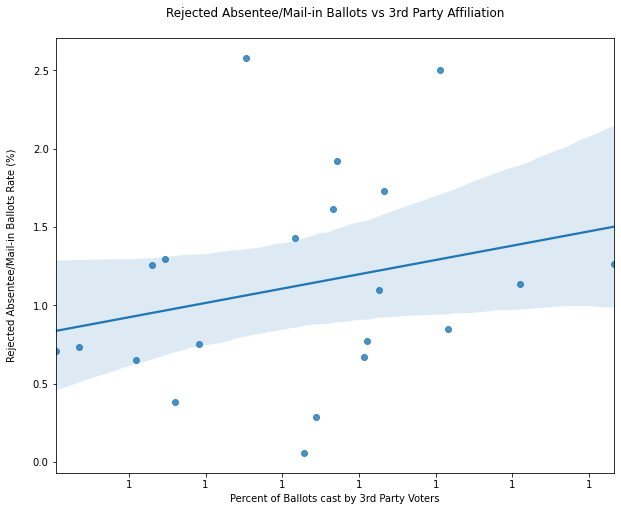

In [45]:
# Plotting a few of the correlated features from the extra age and income data we added in late

fig, ax = plt.subplots(figsize=(10,8))

sns.regplot(x='Percent_Ballots_Cast_Other',
           y='percent_rejected',
           data=df,
           ax=ax)
ax.set(xlabel='Percent of Ballots cast by 3rd Party Voters',
       ylabel='Rejected Absentee/Mail-in Ballots Rate (%)\n',
       title="Rejected Absentee/Mail-in Ballots vs 3rd Party Affiliation\n")

ax.set_xticklabels(['{:,.0f}'.format(x) for x in ax.get_xticks()])

plt.show()

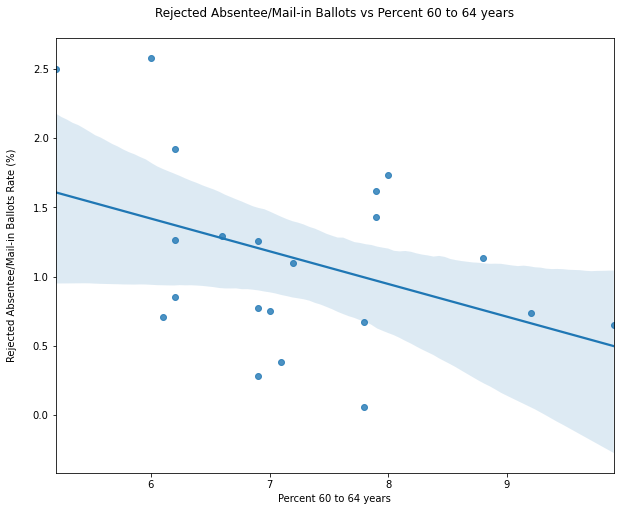

In [48]:
fig, ax = plt.subplots(figsize=(10,8))

sns.regplot(x='Percent 60 to 64 years',
           y='percent_rejected',
           data=df,
           ax=ax)
ax.set(xlabel='Percent 60 to 64 years',
       ylabel='Rejected Absentee/Mail-in Ballots Rate (%)\n',
       title="Rejected Absentee/Mail-in Ballots vs Percent 60 to 64 years\n")

ax.set_xticklabels(['{:,.0f}'.format(x) for x in ax.get_xticks()])

plt.show()

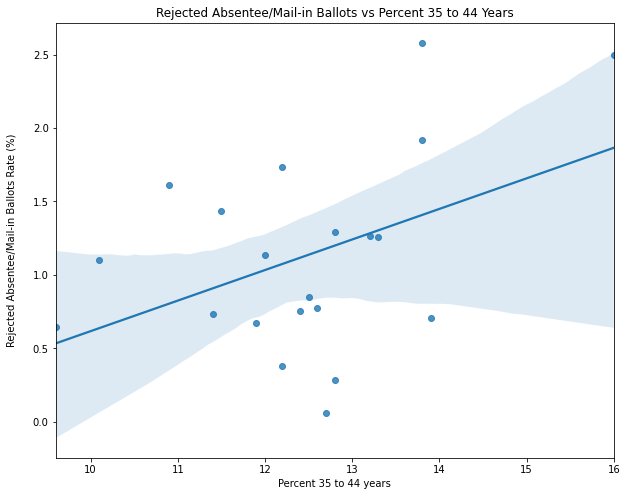

In [47]:
fig, ax = plt.subplots(figsize=(10,8))

sns.regplot(x='Percent 35 to 44 years',
           y='percent_rejected',
           data=df,
           ax=ax)
ax.set(xlabel='Percent 35 to 44 years',
       ylabel='Rejected Absentee/Mail-in Ballots Rate (%)\n',
       title="Rejected Absentee/Mail-in Ballots vs Percent 35 to 44 Years")

ax.set_xticklabels(['{:,.0f}'.format(x) for x in ax.get_xticks()])

plt.show()